## Running LAS

In [1]:
import numpy as np
from pyscf import gto, scf, lib, mcscf
import math
import time
import os
from tools import sign_control, util
from systems.pacircle import PACircle

#Number of HCCH monomers
NCELLS = 16
#Number of HCCH monomers per fragment (1 --> 2C/fragment)
N_PER_FRAG = 1
DIST = 2.5

geom = PACircle(DIST,NCELLS,N_PER_FRAG,fn="logs/pacircle.log")
las = geom.make_las_state_average()

#Build LAS states
print("Initiating LAS Model Space...")
start = time.perf_counter()
las.lasci_()
las.ci = sign_control.fix_sign(las) #sign fixing
stop = time.perf_counter()
print("Done. Time elapsed:",stop-start,"seconds")
las.dump_spaces()

#Run LASSI
print("Running LASSI...")
start = time.perf_counter()
from mrh.my_pyscf import lassi
lsi = lassi.LASSI(las)
energies_lassi, civecs_lassi = lsi.kernel()
civecs_lassi = lsi.get_sivec_vacuum_shuffle(state=0) #sign fixing
stop = time.perf_counter()
print("Done. Time elapsed:",stop-start,"seconds")

/home/king1305/Apps/pyscf/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


overwrite output file: logs/pacircle.log
Initiating LAS Model Space...
Done. Time elapsed: 45.88167782803066 seconds
Running LASSI...
Done. Time elapsed: 9.09752683294937 seconds


## Plotting Band Structure

[-1215.15 -1214.8  -1214.8  -1214.8  -1214.8  -1214.8  -1214.8  -1214.8
 -1214.8  -1214.8  -1214.8  -1214.8  -1214.8  -1214.8  -1214.8  -1214.8
 -1214.8  -1214.78 -1214.78 -1214.78 -1214.78 -1214.78 -1214.78 -1214.78
 -1214.78 -1214.78 -1214.78 -1214.78 -1214.78 -1214.78 -1214.78 -1214.78
 -1214.78]


,LAS
IP,6.62
EA,-6.24
GAP,12.86


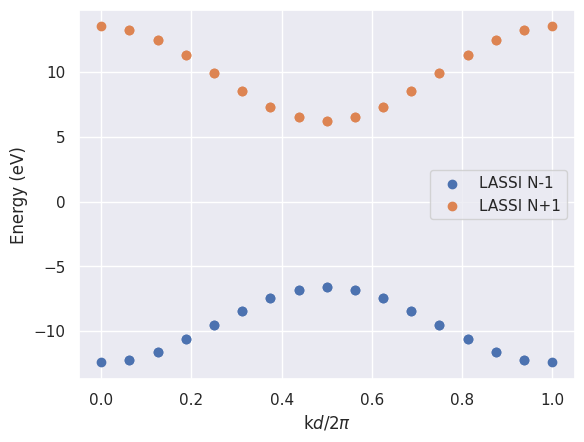

In [2]:
from tools import bandh
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

las_charges = util.las_charges(las)
hdct = bandh.make_hdct(civecs_lassi,energies_lassi,las_charges)
df = bandh.make_bands(hdct)
plt.legend()
plt.xlabel("k$d$/2$\pi$")
plt.ylabel("Energy (eV)") #Note here we plot w/ only 16 H, so less number of k points
np.round(df,2)